# Input the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn import preprocessing, tree
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import kagglehub
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import time
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.neural_network import MLPClassifier
from joblib import Parallel, delayed
from tqdm import tqdm
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from tabulate import tabulate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Input our data into kaggle

In [ ]:
downlod_data = kagglehub.dataset_download('sameepvani/nasa-nearest-earth-objects')
read_data = pd.read_csv("/root/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo.csv")
data = pd.DataFrame(read_data)
display(data)

id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
0           13569.249224   5.483974e+07         Earth          False   
1           73588.726663   6.143813e+07         Earth          False   
2          114258.692129   4.979872e+07         Earth          False   
3           24764.303138   2.543497e+07         Earth          False   
4           42737.733765   4.627557e+07         Earth          False   
...                  ...            ...           ...            ...   
90831       52078.886692   1.230039e+07         Earth          False   
90832       46114.605073   5.432121e+07         Earth          False   
90833        7566.807732   2.840077e+07         Earth          False   
90834       69199.154484   6.869206e+07         Earth          False   
90835       27024.455553   5.977213e+07         Earth          False   

       absolute_magnitude  hazardous  
0                   16.73      False  
1                   20.00       True  
2                   17.83      False  
3                   22.20      False  
4                   20.09       True  
...                   ...        ...  
90831               25.00      False  
90832               26.00      False  
90833               24.60      False  
90834               27.80      False  
90835               24.12      False  

[90836 rows x 10 columns]

# **Data preprocessing**

---



In [ ]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
data.describe()

id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.700000  
75%     5.654900e+07           25.700000  
max     7.479865e+07           33.200000

# In this section i looked that is there any missing values. And i realied there is no missing value

<Axes: >

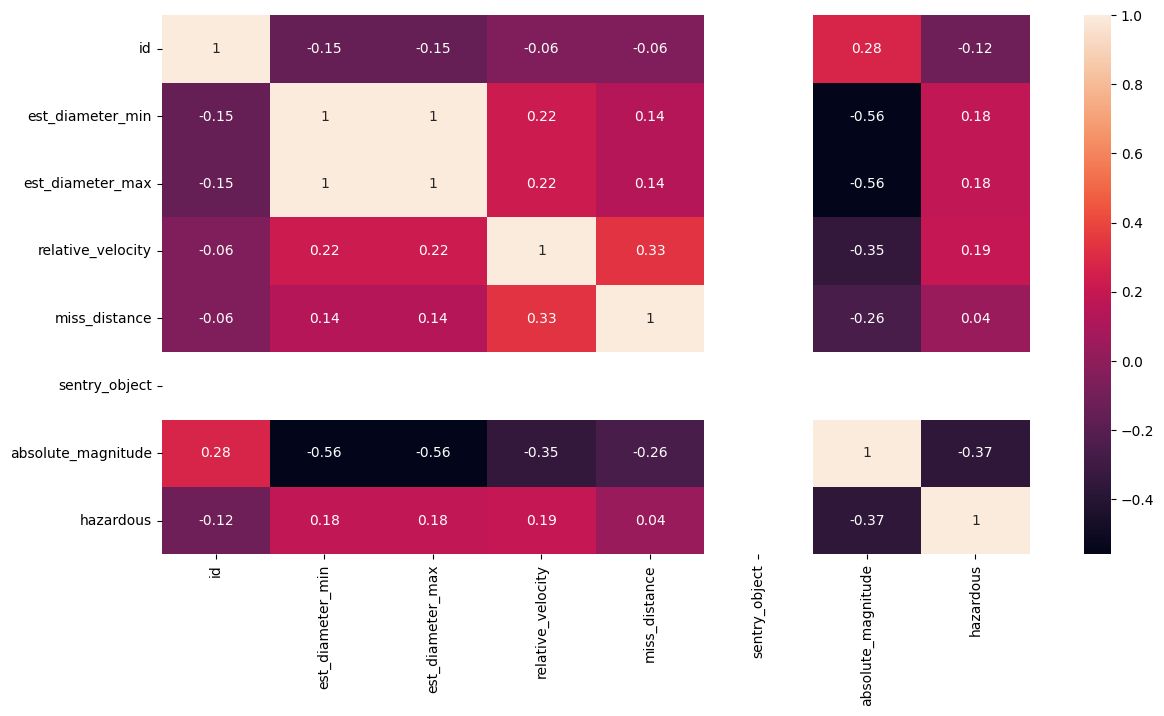

In [ ]:
correlation = data.corr(method='pearson', min_periods=1, numeric_only=True).round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'rocket')

# **Pairplot for raw data**  ⏳

---




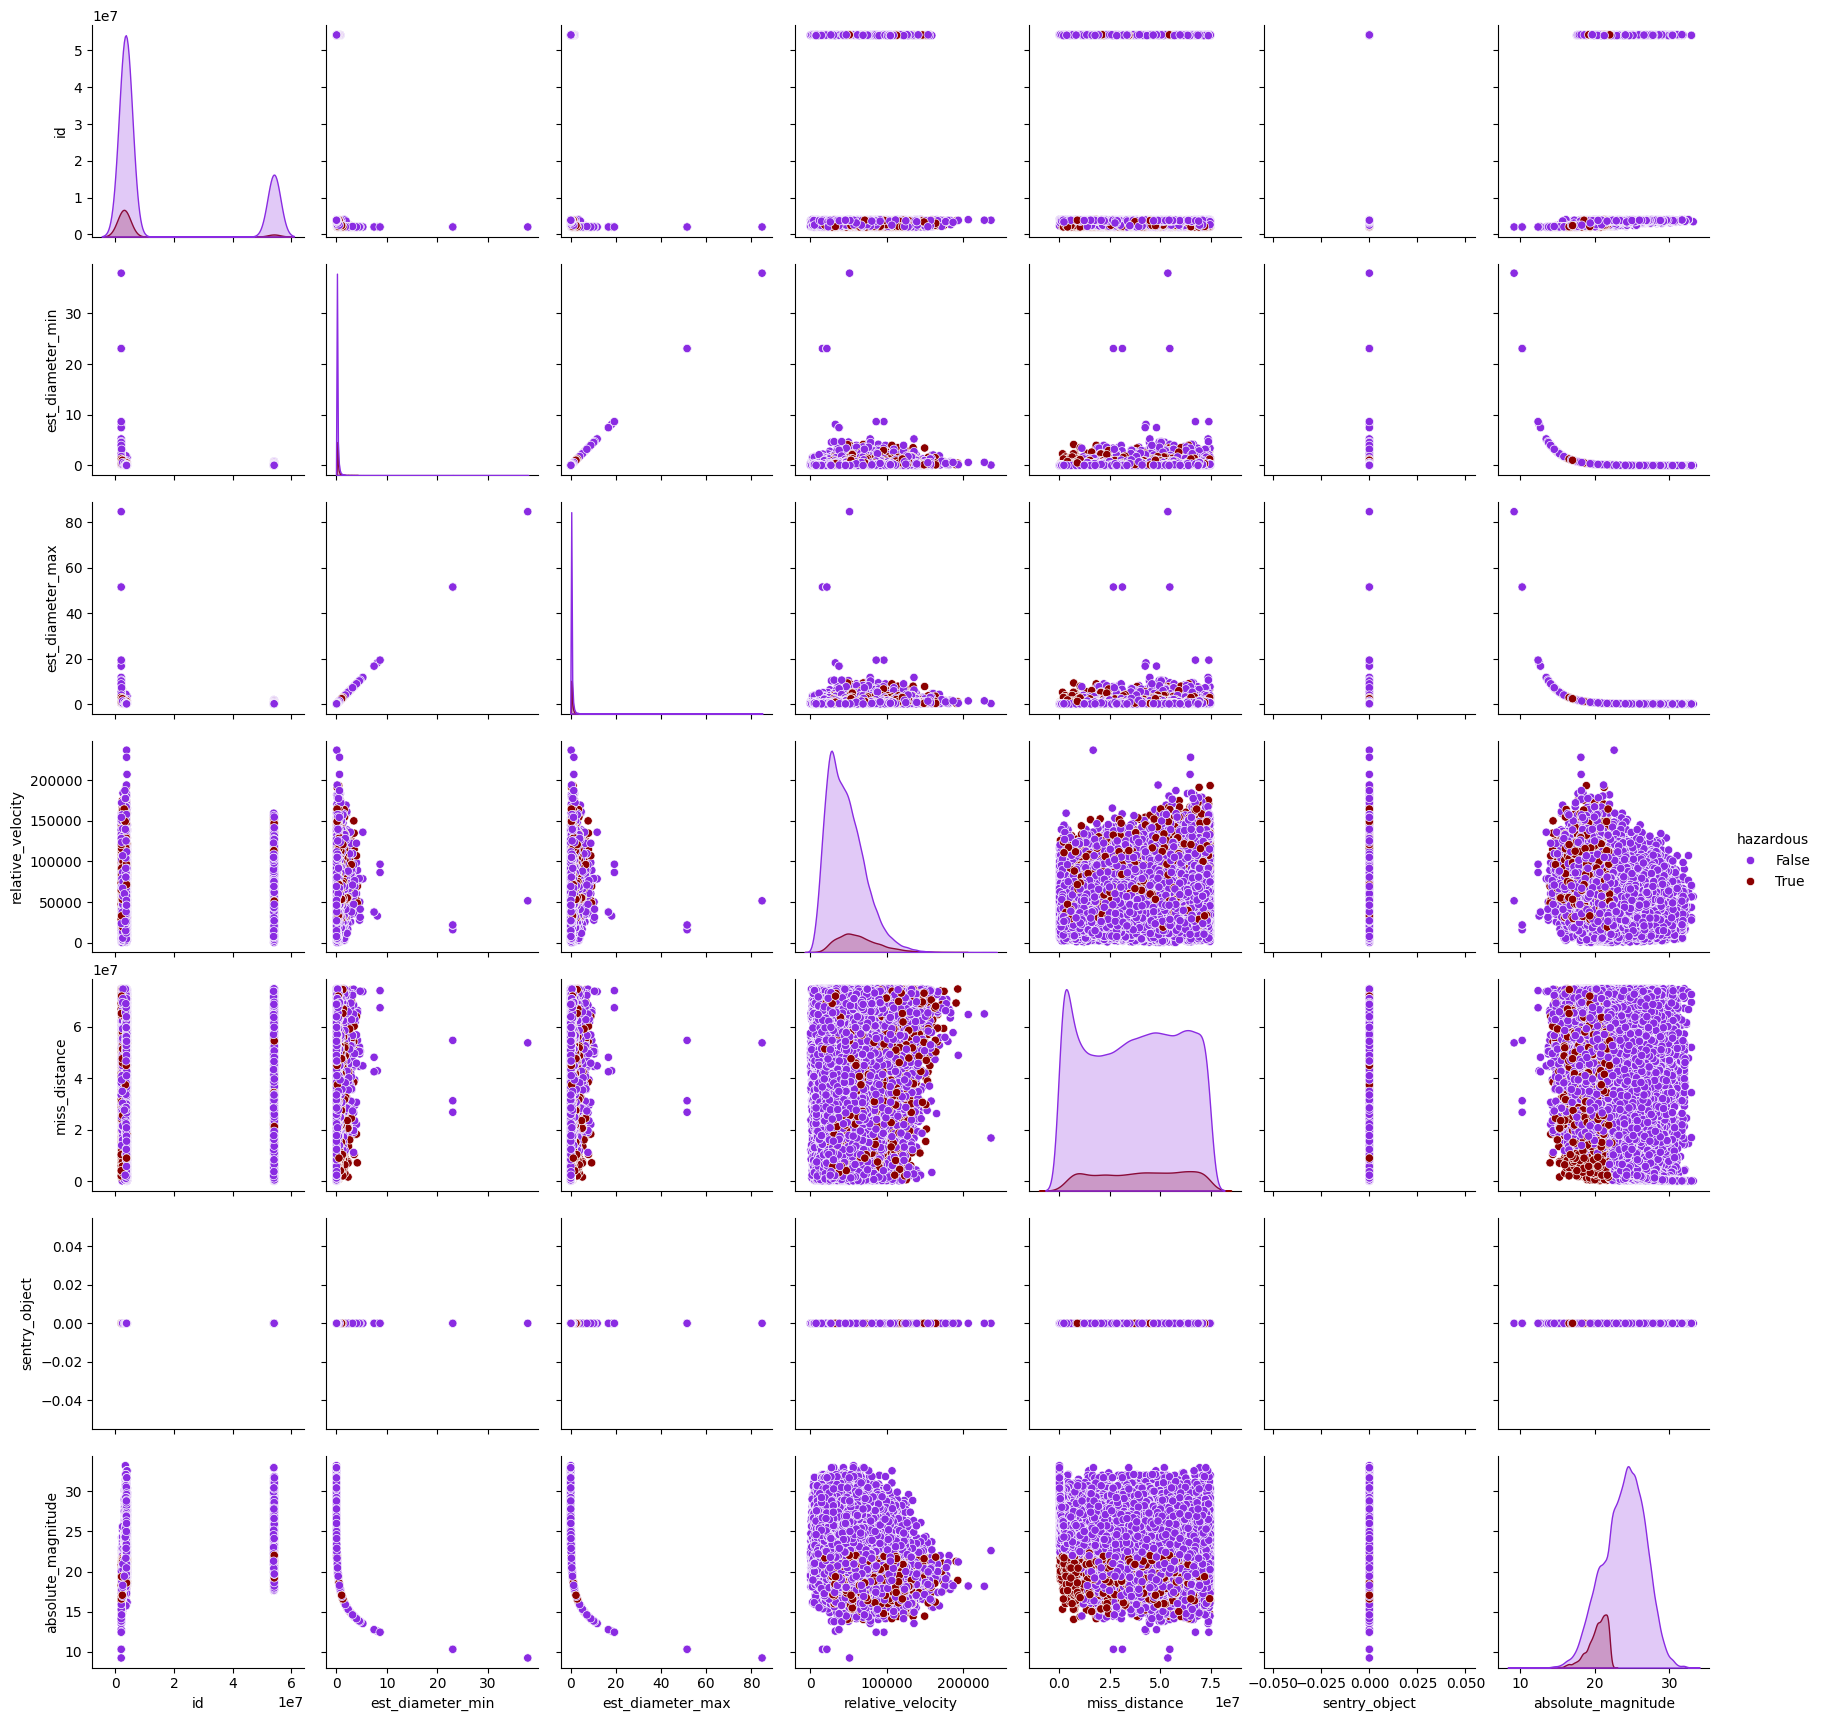

In [ ]:
sns.pairplot(data , hue = 'hazardous', palette= ['#8A2BE2',  '#8B0000'])

<ipython-input-15-c54cc7872f7d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.est_diameter_min, kde = False,  color= '#66CDAA')
<ipython-input-15-c54cc7872f7d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.est_diameter_max, kde = False,  color= '#66CDAA')
<ipython-input-15-c54cc7

<Axes: xlabel='absolute_magnitude'>

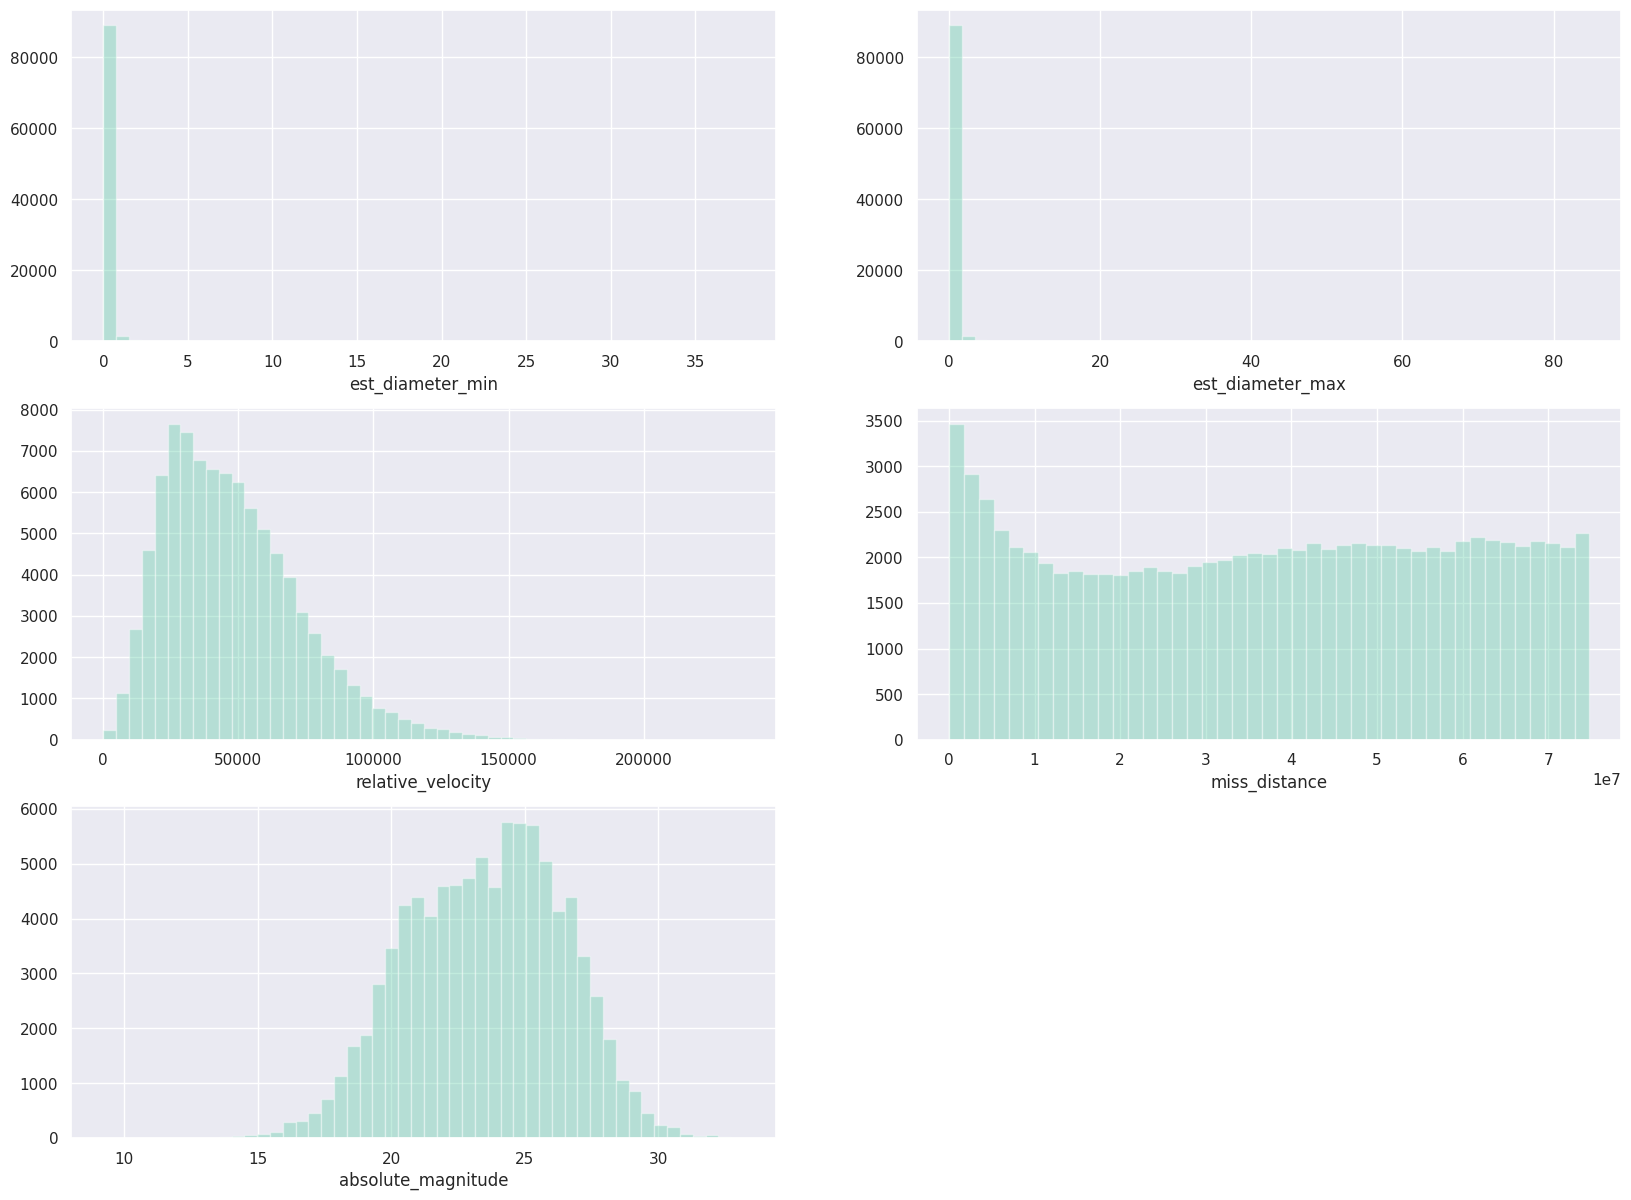

In [ ]:
plt.figure(figsize = (20,25))

# sns.set(color_codes = True)

plt.subplot(5,2,1)
sns.distplot(data.est_diameter_min, kde = False,  color= '#66CDAA')

plt.subplot(5,2,2)
sns.distplot(data.est_diameter_max, kde = False,  color= '#66CDAA')

plt.subplot(5,2,3)
sns.distplot(data.relative_velocity, kde = False,  color= '#66CDAA')

plt.subplot(5,2,4)
sns.distplot(data.miss_distance, kde = False,  color= '#66CDAA')

plt.subplot(5,2,5)
sns.distplot(data.absolute_magnitude, kde = False,  color= '#66CDAA')

In [ ]:
#Dataframe with all the 3 categorical attributes
count_3 = [data.groupby(['orbiting_body'])['orbiting_body'].count(),
           data.groupby(['sentry_object'])['sentry_object'].count()]

In [ ]:
print(count_3)

[orbiting_body
Earth    90836
Name: orbiting_body, dtype: int64, sentry_object
False    90836
Name: sentry_object, dtype: int64]


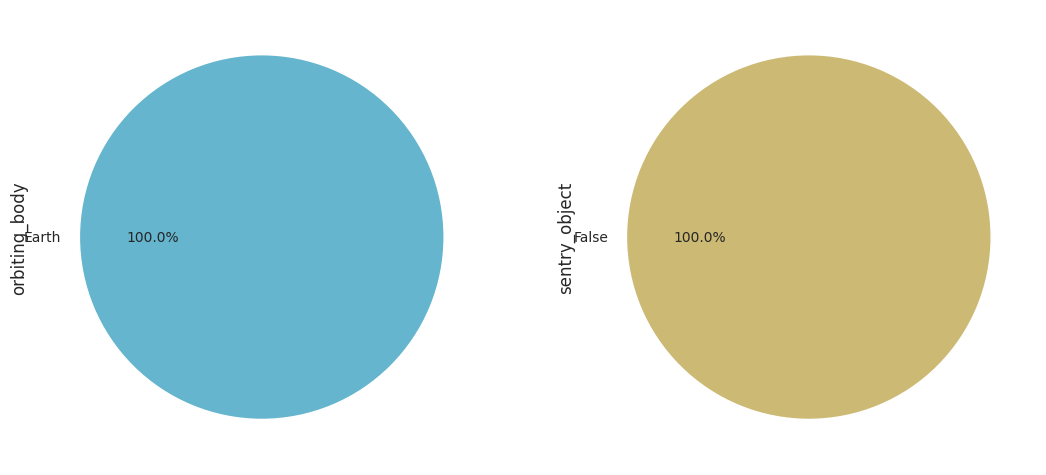

In [ ]:
#Create 3 sections in a figure to hold the subplots
fig=plt.figure()
#Get me the 1st section
ax1=fig.add_subplot(131)
#Get me the 2nd section
ax2=fig.add_subplot(132)

#Plot the 3 pies in the respective sections
count_3[0].plot(kind='pie', ax=ax1, autopct='%1.1f%%',figsize=(20,20), fontsize=10, colors= "cyan")
count_3[1].plot(kind='pie', ax=ax2, autopct='%1.1f%%',figsize=(20,20), fontsize=10, colors= "yellow")
plt.show()

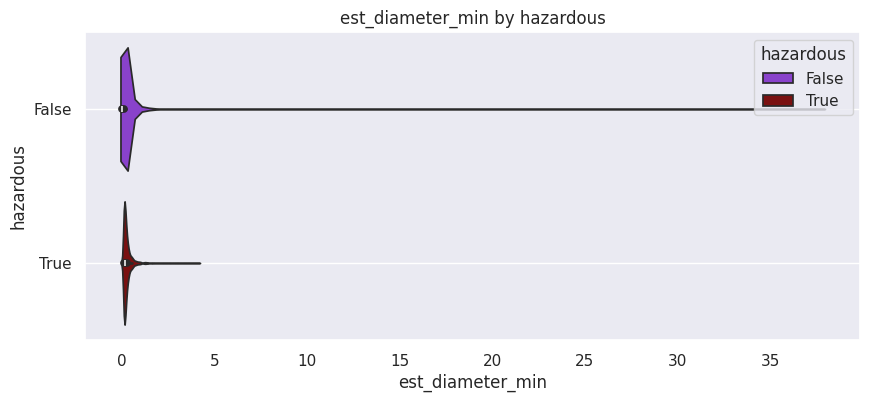

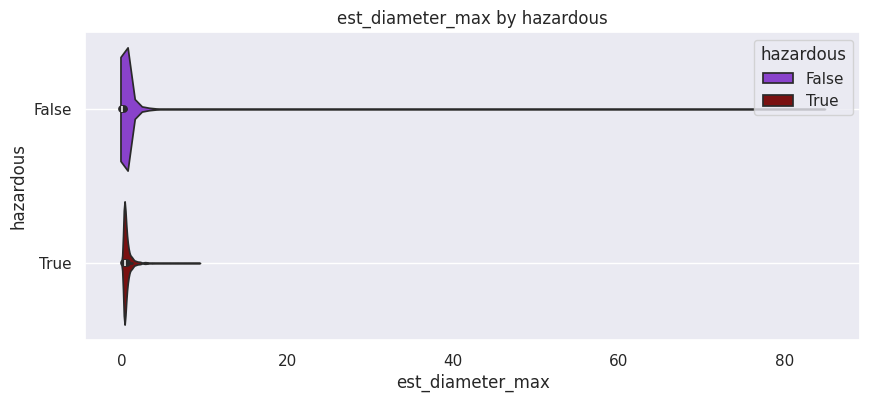

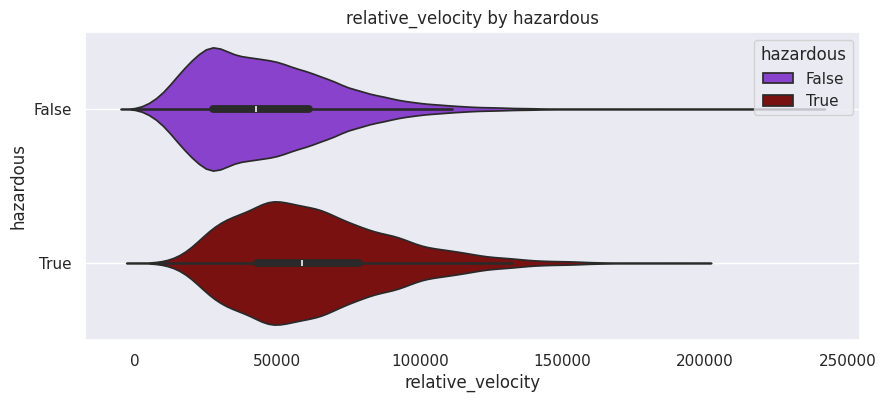

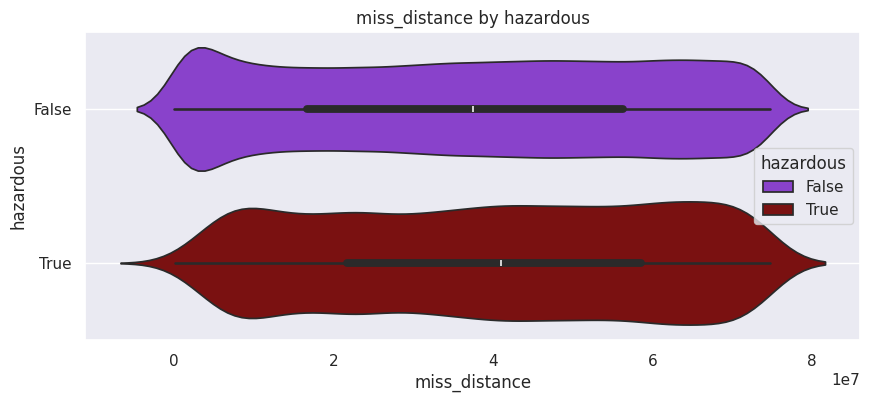

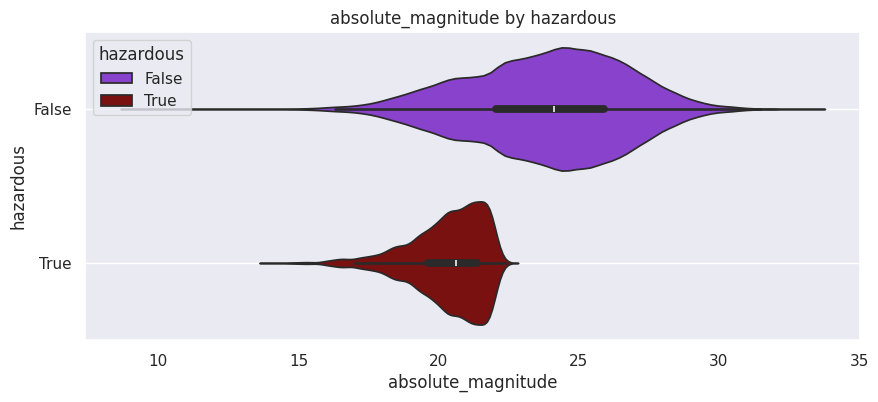

In [ ]:
features = ['est_diameter_min', 'est_diameter_max',
                'relative_velocity', 'miss_distance',
                'absolute_magnitude']

for f in features:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=data, x=f, y='hazardous', orient='h', hue= 'hazardous',  palette= ['#8A2BE2',  '#8B0000'])
    my_title = f + ' by hazardous'
    plt.title(my_title)
    plt.grid()

In [ ]:
data.drop(["id", "name", "orbiting_body", "sentry_object", "est_diameter_min"], axis=1, inplace=True)
data.head()

est_diameter_max  relative_velocity  miss_distance  absolute_magnitude  \
0          2.679415       13569.249224   5.483974e+07               16.73   
1          0.594347       73588.726663   6.143813e+07               20.00   
2          1.614507      114258.692129   4.979872e+07               17.83   
3          0.215794       24764.303138   2.543497e+07               22.20   
4          0.570217       42737.733765   4.627557e+07               20.09   

   hazardous  
0      False  
1       True  
2      False  
3      False  
4       True

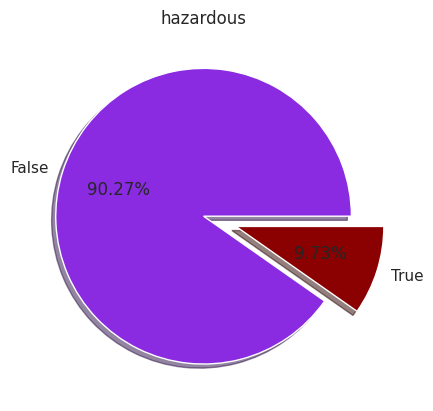

In [ ]:
explode = (0, 0.23)
plt.pie(data['hazardous'].value_counts() , labels = ['False' , 'True'] , autopct = '%1.2f%%' , explode = explode , shadow = True , colors = ['#8A2BE2',  '#8B0000'])
plt.title('hazardous')
plt.show()

In [ ]:
data_train , test_data = train_test_split(data , test_size = 0.15, random_state= 42)
data_analyses , val_data = train_test_split(data_train , test_size = 0.17, random_state= 42)

In [ ]:
print(test_data.hazardous.value_counts())
print(data_analyses.hazardous.value_counts())
print(val_data.hazardous.value_counts())

hazardous
False    12340
True      1286
Name: count, dtype: int64
hazardous
False    57810
True      6274
Name: count, dtype: int64
hazardous
False    11846
True      1280
Name: count, dtype: int64


In [ ]:
data_noise = data_analyses

In [ ]:
lowoutliers  = data_analyses.absolute_magnitude.quantile(0.75) + (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5
highoutliers = data_analyses.absolute_magnitude.quantile(0.25) - (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5

<ipython-input-28-ceca697e8efb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.absolute_magnitude, palette=['#FF1700'], ax = ax2)


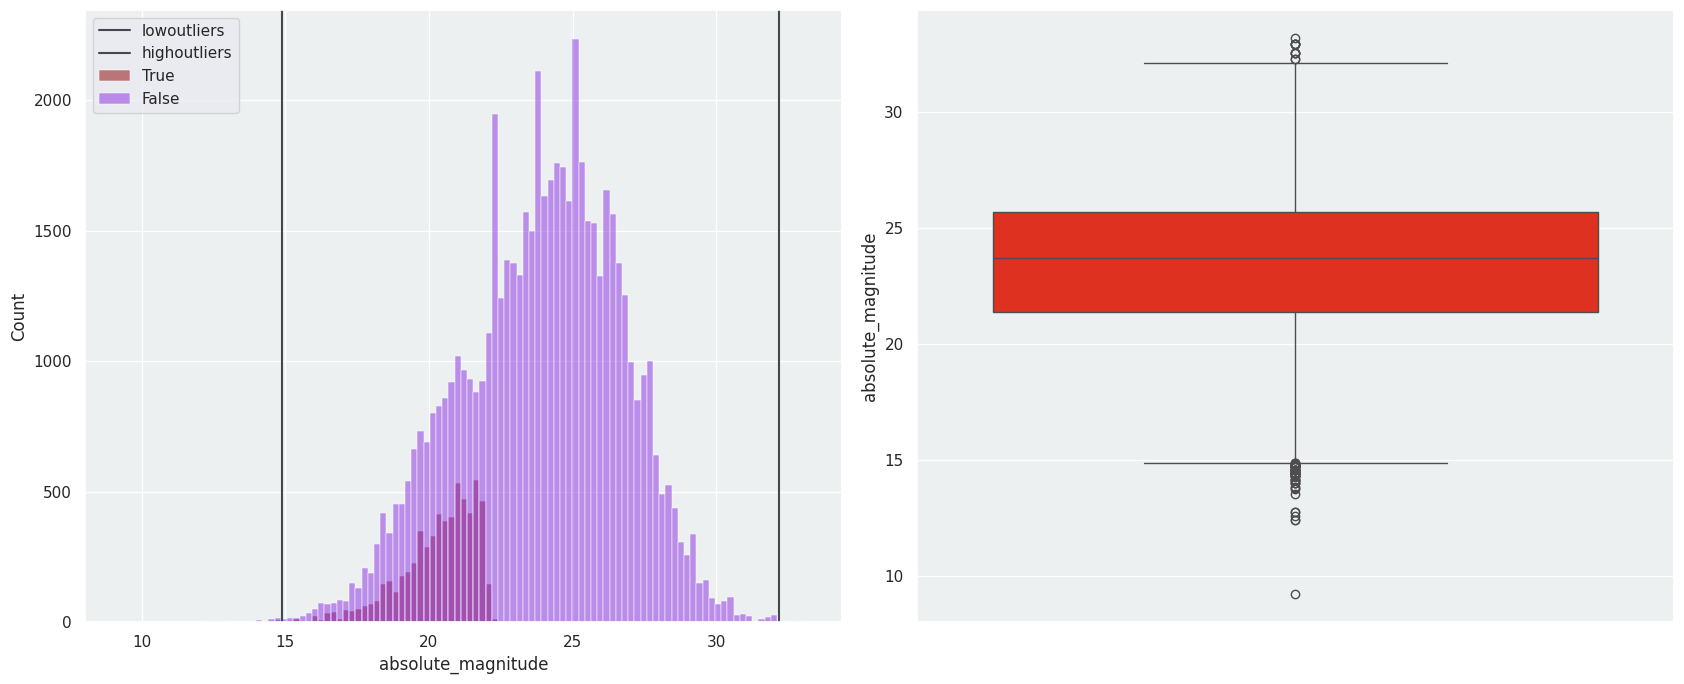

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(17, 7))
sns.histplot(data_analyses , x = 'absolute_magnitude' , hue = 'hazardous', palette=['#8A2BE2',  '#8B0000'], ax = ax1)
plt.gca().set_facecolor('#f0f0f0')
ax1.axvline(x = lowoutliers, color='#424949')
ax1.axvline(x = highoutliers, color='#424949')
sns.boxplot(data_analyses.absolute_magnitude, palette=['#FF1700'], ax = ax2)
ax1.legend(['lowoutliers', 'highoutliers', 'True' , 'False'])
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.tight_layout()
plt.show()

In [ ]:
data_noise = data_noise[data_noise['absolute_magnitude']<= lowoutliers]
data_noise = data_noise[data_noise['absolute_magnitude']>= highoutliers]

<ipython-input-30-171d42533bb1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.miss_distance, palette=['#FF1700'], ax = ax2)


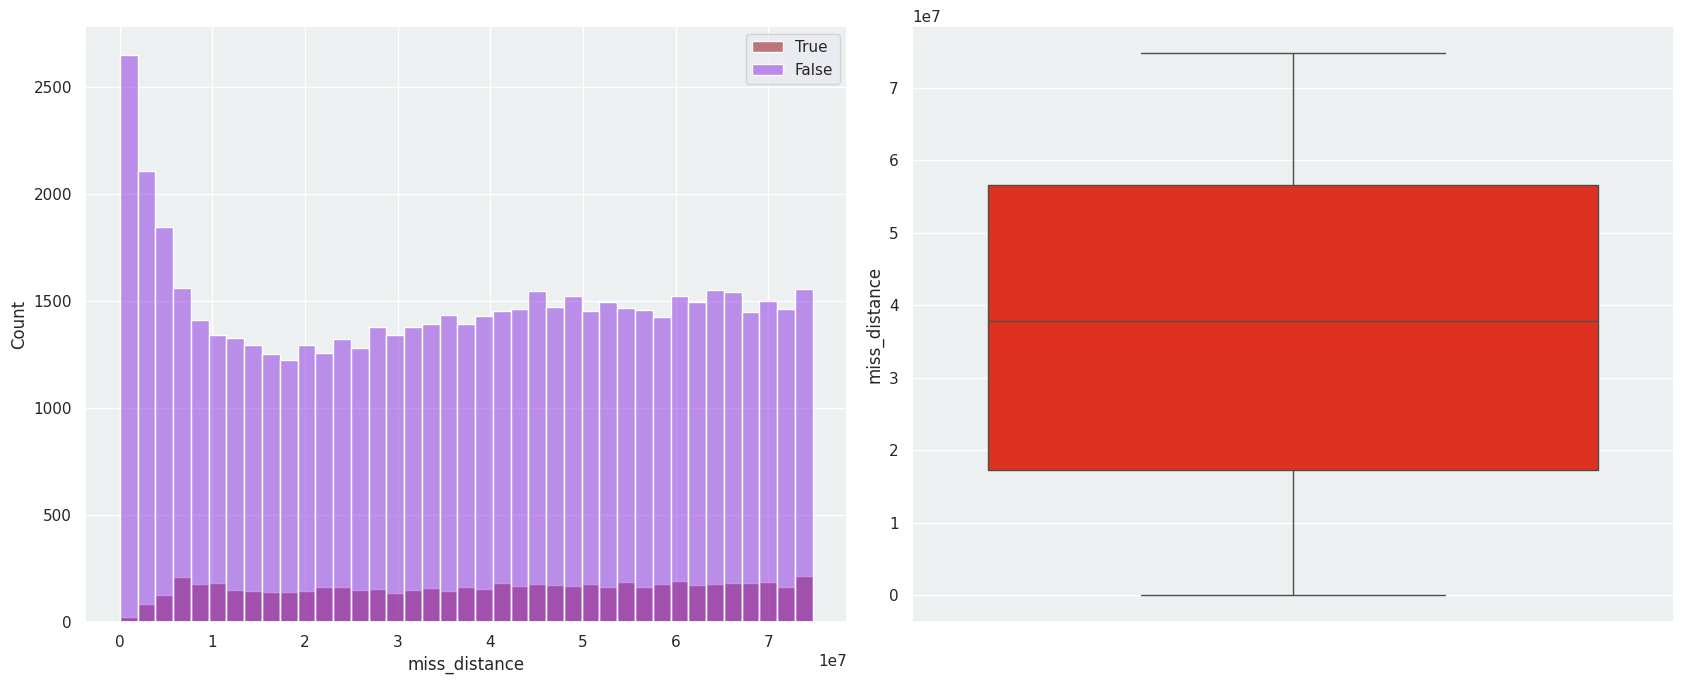

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(17, 7))
sns.histplot(data_analyses , x = 'miss_distance' , hue = 'hazardous', palette=['#8A2BE2',  '#8B0000'], ax = ax1)
sns.boxplot(data_analyses.miss_distance, palette=['#FF1700'], ax = ax2)
ax1.legend(['True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
lowoutliers2  = data_analyses.relative_velocity.quantile(0.75) + (data_analyses.relative_velocity.quantile(0.75) - data_analyses.relative_velocity.quantile(0.25)) * 1.5

<ipython-input-32-d35165b3499e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.relative_velocity, palette=['#FF1700'], ax = ax2)


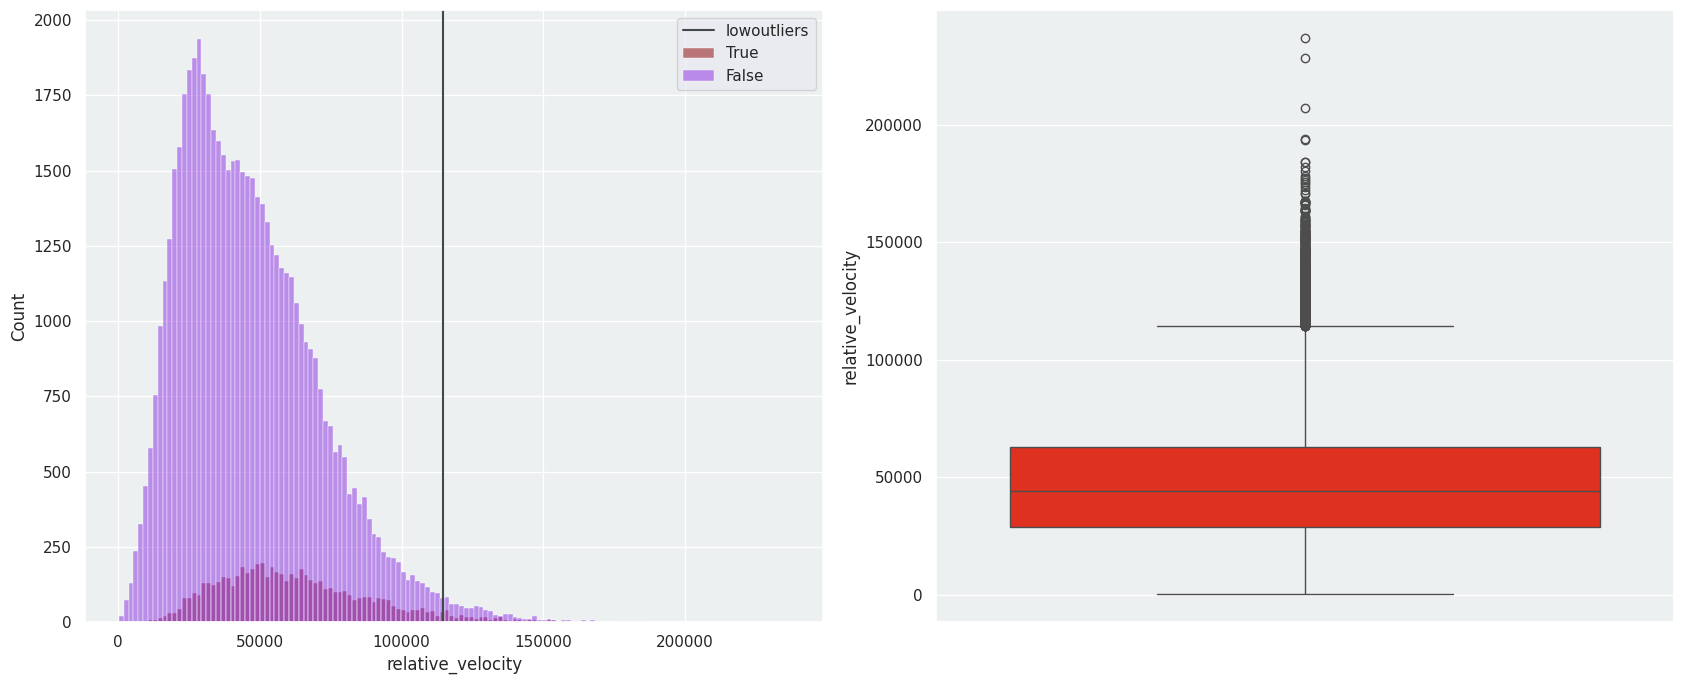

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(17, 7))
sns.histplot(data_analyses , x = 'relative_velocity', palette=['#8A2BE2',  '#8B0000'], hue = 'hazardous' , ax = ax1)
ax1.axvline(x = lowoutliers2, color='#424949')
sns.boxplot(data_analyses.relative_velocity, palette=['#FF1700'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['relative_velocity']<= lowoutliers2]

In [ ]:
lowoutliers3  = data_analyses.est_diameter_max.quantile(0.75) + (data_analyses.est_diameter_max.quantile(0.75) - data_analyses.est_diameter_max.quantile(0.25)) * 1.5

<ipython-input-35-0c0b5d797cb8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.est_diameter_max, palette=['#FF1700'], ax = ax2)


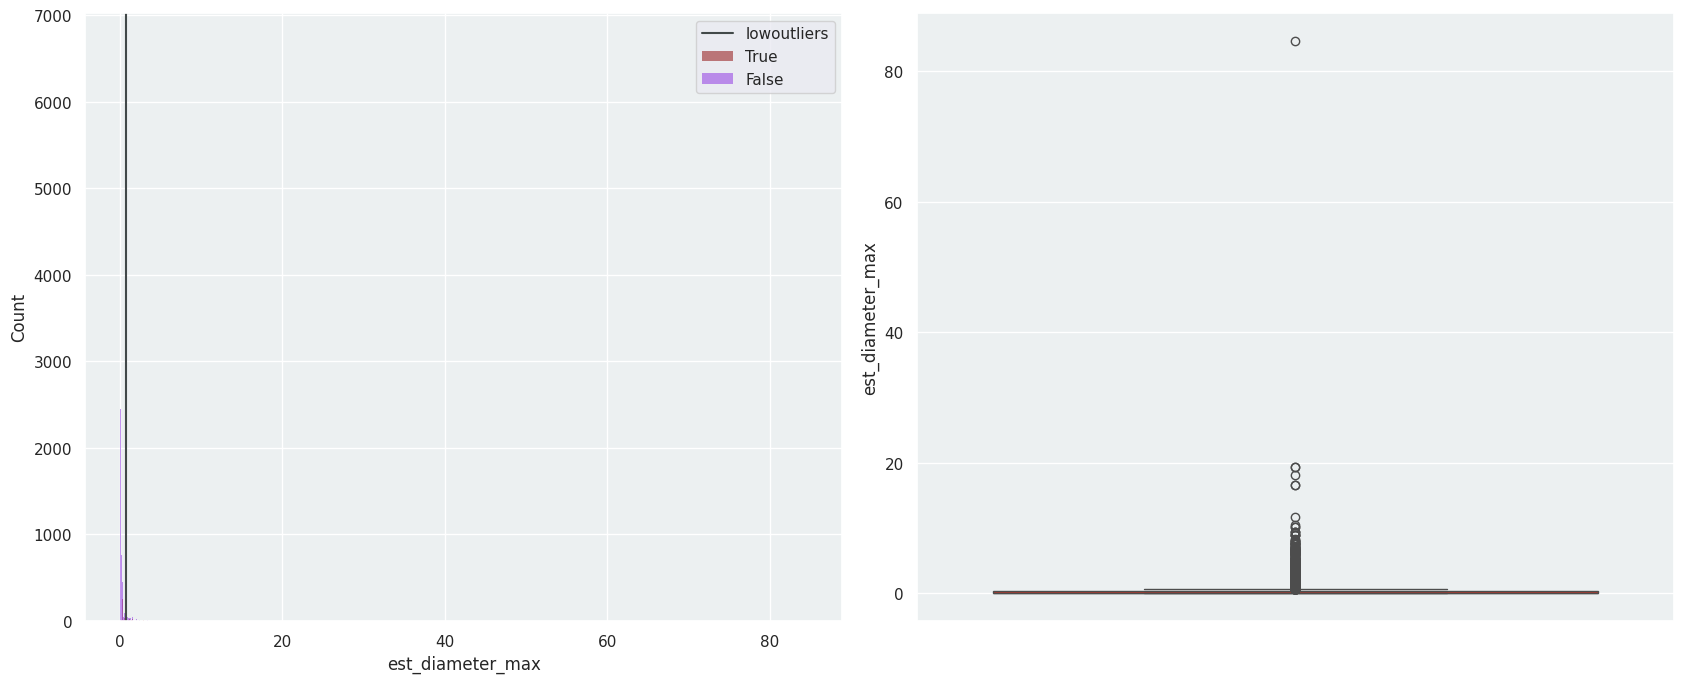

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(17, 7))
sns.histplot(data_analyses , x = 'est_diameter_max' , hue = 'hazardous', palette=['#8A2BE2',  '#8B0000'], ax = ax1)
ax1.axvline(x = lowoutliers3, color='#424949')
sns.boxplot(data_analyses.est_diameter_max, palette=['#FF1700'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['est_diameter_max']<= lowoutliers3]

# **Pairplot for deleted data**  ⏳

---




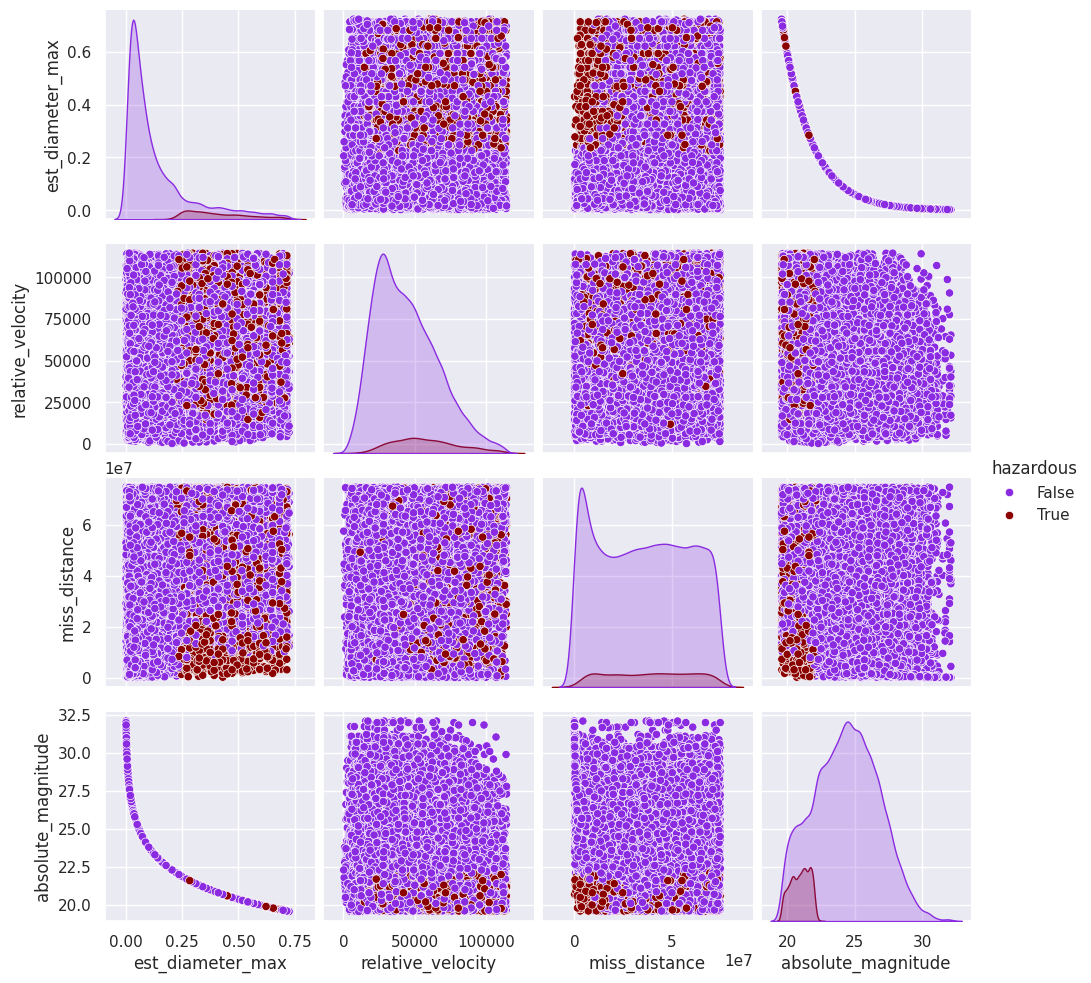

In [ ]:
sns.pairplot(data_noise , hue = 'hazardous', palette= ['#8A2BE2',  '#8B0000'])

In [ ]:
# X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
# resampling due to imbalanced dataset
minority_class_percent = 100 - round(sum(y) / len(y) * 100)
print("Minority class percentage: {}%".format(str(minority_class_percent)))

Minority class percentage: 90%


# **Balance target**

In [ ]:
print(data_noise.hazardous.value_counts())

hazardous
False    52989
True      4596
Name: count, dtype: int64


In [ ]:
# 1 --> 0
# smote = SMOTE()
# data_balance, target_balance = smote.fit_resample(data_analyses,data_analyses['hazardous'])
# data_balance['hazardous'] = target_balance
# data_analyses = data_balance

In [ ]:
# # 1 --> 0
df_minority_upsampled = resample(data_noise[data_noise.hazardous== 1], replace= True, n_samples= len(data_noise[data_noise.hazardous== 0]), random_state= 42)
data_resample = pd.concat([data_noise[data_noise.hazardous== 0], df_minority_upsampled])

In [ ]:
# 0 --> 1
# df_majority_upsampled = resample(data_analyses[data_analyses.hazardous== 0], replace= False, n_samples= len(data_analyses[data_analyses.hazardous== 1]), random_state= 42)
# data_analyses = pd.concat([df_majority_upsampled, data_analyses[data_analyses.hazardous== 1]], axis=0)

In [ ]:
# 0 --> 1
# 1 --> 0
# df_majority_upsampled = resample(data_analyses[data_analyses.hazardous== 0], replace= False, n_samples= int(len(data_analyses[data_analyses.hazardous== 1])* 0.5), random_state= 42)

# df_minority_upsampled = resample(data_analyses[data_analyses.hazardous== 1], replace= True, n_samples= int(len(df_majority_upsampled)), random_state= 42)

# data_analyses = pd.concat([df_majority_upsampled, df_minority_upsampled], axis=0)

# data_analyses = data_analyses.sample(frac= 1, random_state= 42).reset_index(drop= True)

In [ ]:
print(data_resample.hazardous.value_counts())

hazardous
False    52989
True     52989
Name: count, dtype: int64


<ipython-input-43-ae974ecbfe56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'hazardous', palette= ['#8A2BE2',  '#8B0000'], data = data_resample)


<Axes: xlabel='hazardous', ylabel='count'>

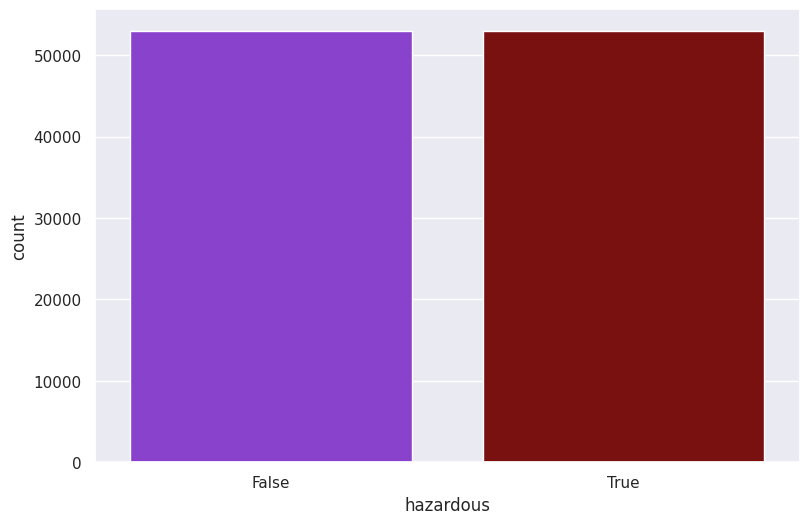

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(3,2,3)
sns.countplot(x = 'hazardous', palette= ['#8A2BE2',  '#8B0000'], data = data_resample)

# **Pairplot for resample data**  ⏳

---




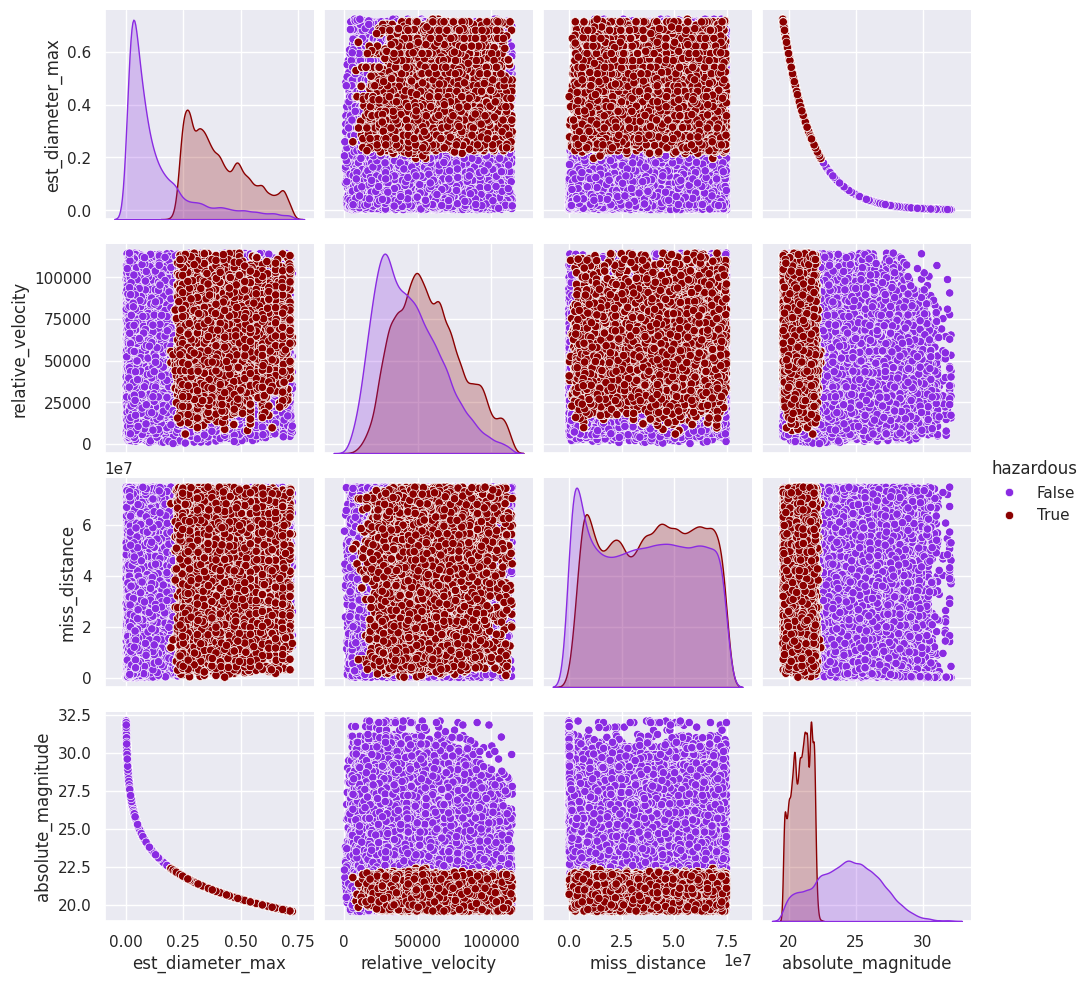

In [ ]:
sns.pairplot(data_resample , hue = 'hazardous', palette= ['#8A2BE2',  '#8B0000'])

In [ ]:
data_noise_2 = data_resample

In [ ]:
lowoutliers  = data_noise.absolute_magnitude.quantile(0.75) + (data_noise.absolute_magnitude.quantile(0.75) - data_noise.absolute_magnitude.quantile(0.25)) * 1.5

<ipython-input-47-c97cfe482328>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_noise.absolute_magnitude, palette=['#FF1700'], ax = ax2)


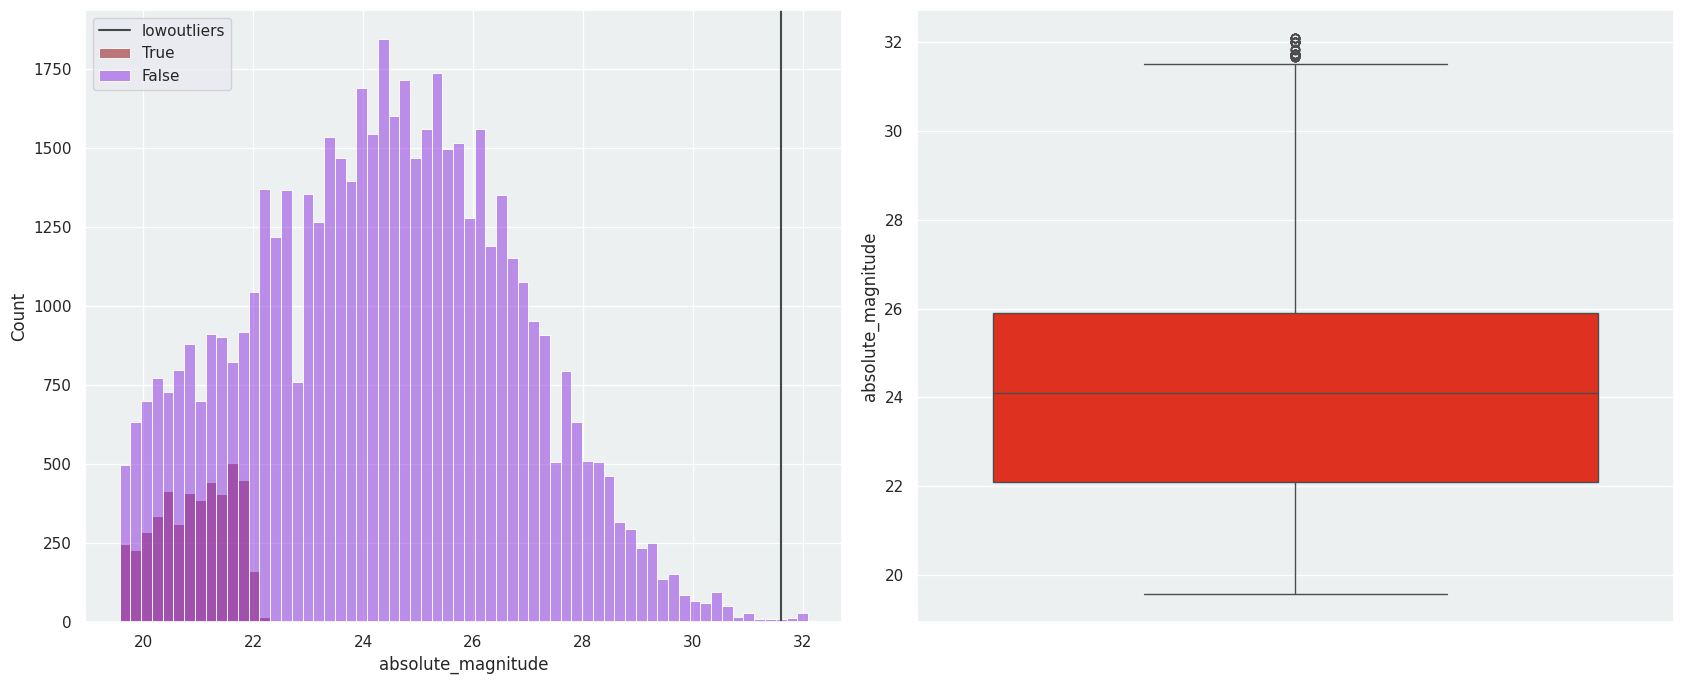

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(17, 7))
sns.histplot(data_noise , x = 'absolute_magnitude' , hue = 'hazardous', palette=['#8A2BE2',  '#8B0000'], ax = ax1)
plt.gca().set_facecolor('#f0f0f0')
ax1.axvline(x = lowoutliers, color='#424949')
sns.boxplot(data_noise.absolute_magnitude, palette=['#FF1700'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.tight_layout()
plt.show()

In [ ]:
data_noise_2 = data_noise_2[data_noise_2['absolute_magnitude']<= lowoutliers]

<ipython-input-49-1a661a02056e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_noise.miss_distance, palette=['#FF1700'], ax = ax2)


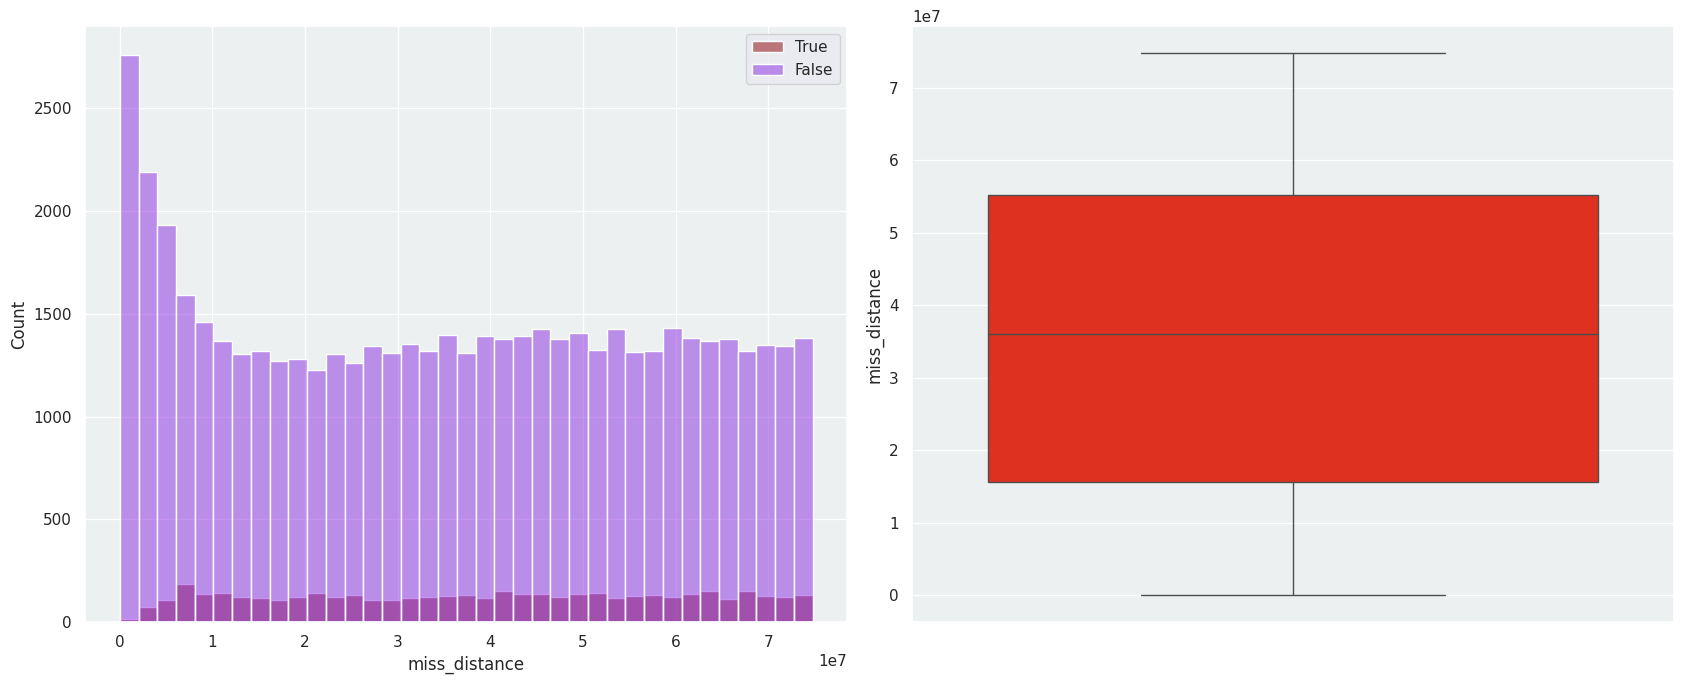

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(17, 7))
sns.histplot(data_noise , x = 'miss_distance' , hue = 'hazardous', palette=['#8A2BE2',  '#8B0000'], ax = ax1)
sns.boxplot(data_noise.miss_distance, palette=['#FF1700'], ax = ax2)
ax1.legend(['True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

<ipython-input-50-550e6c39379a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_noise.est_diameter_max, palette=['#FF1700'], ax = ax2)


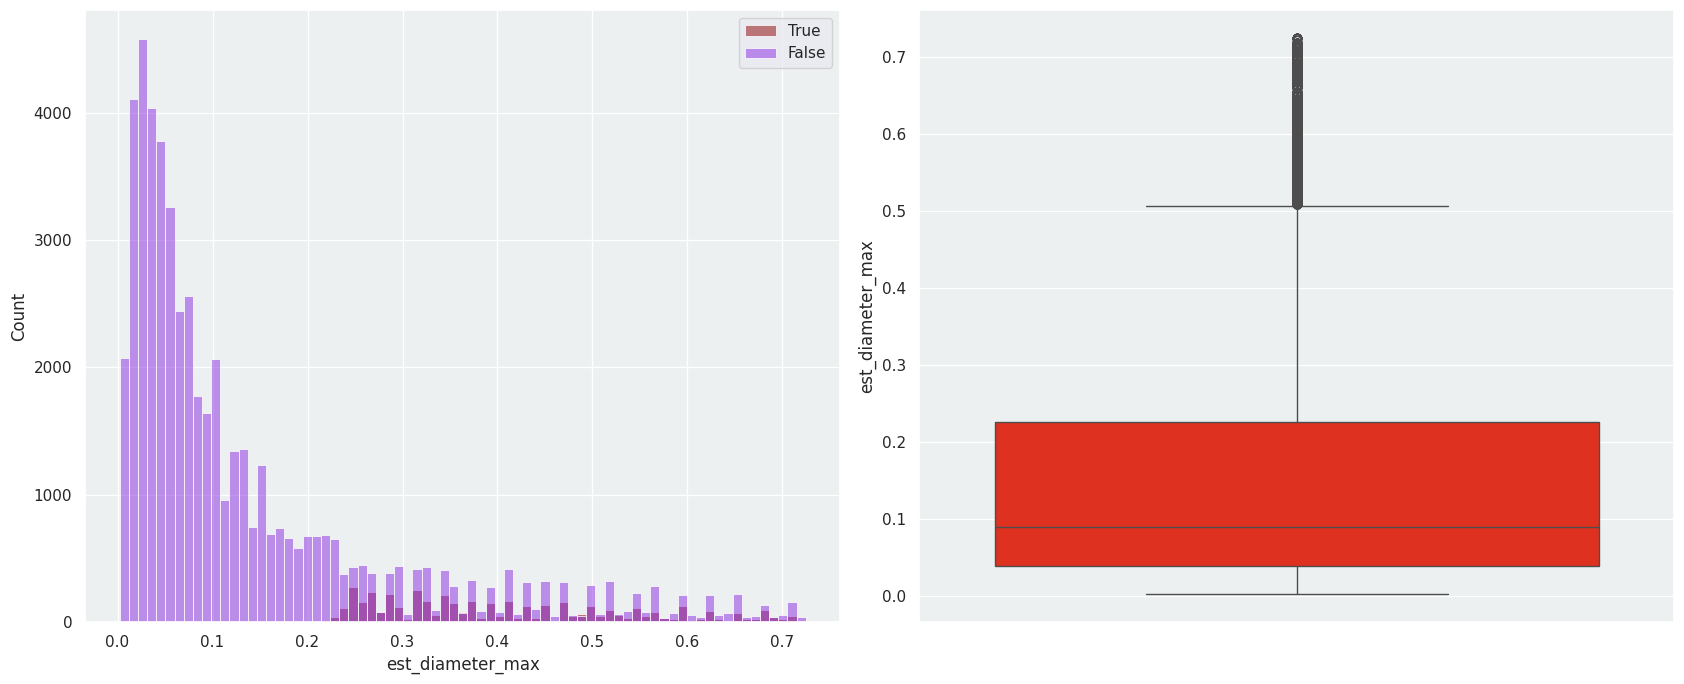

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(17, 7))
sns.histplot(data_noise , x = 'est_diameter_max' , hue = 'hazardous', palette=['#8A2BE2',  '#8B0000'], ax = ax1)
sns.boxplot(data_noise.est_diameter_max, palette=['#FF1700'], ax = ax2)
ax1.legend(['True' , 'False'])
plt.gca().set_facecolor('#424949')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

# **Pairplot for deleted data**  ⏳



---





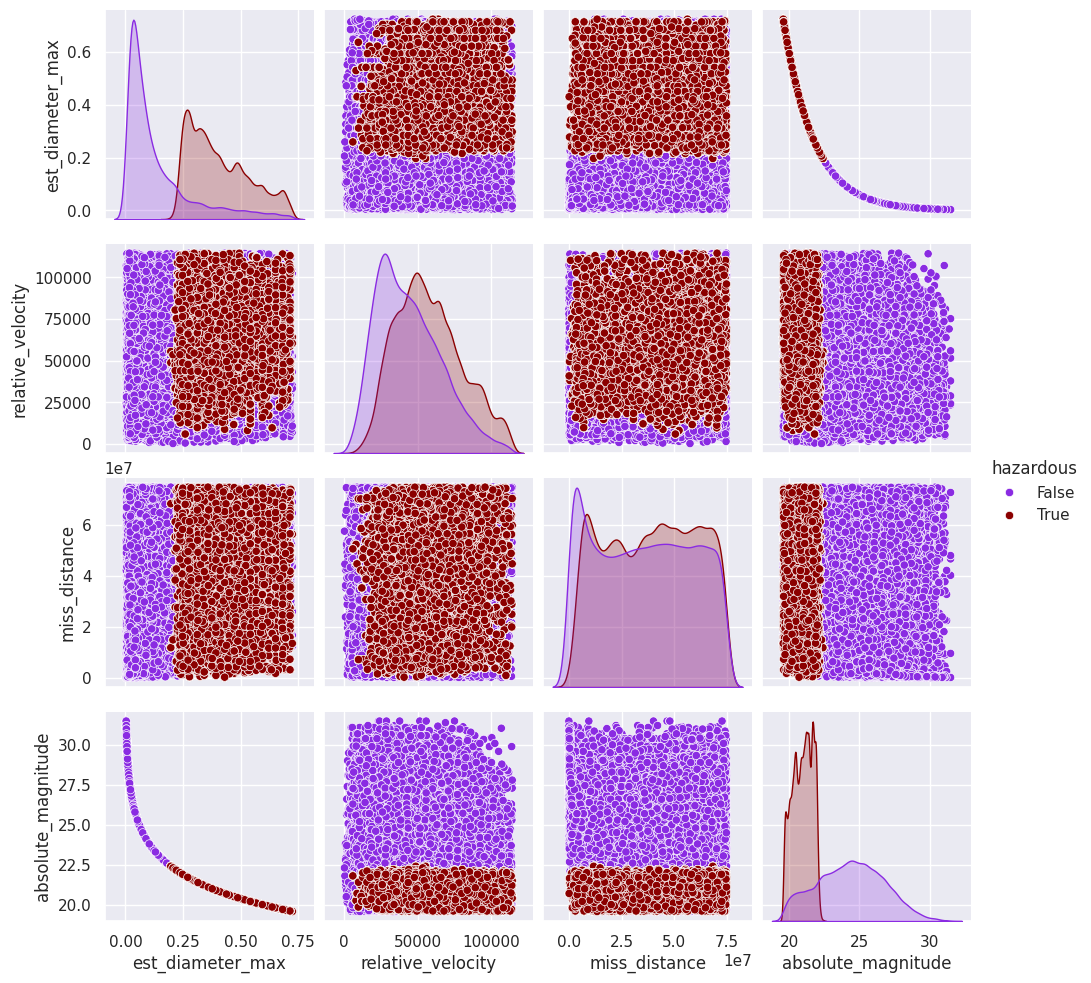

In [ ]:
sns.pairplot(data_noise_2, hue='hazardous', palette=['#8A2BE2',  '#8B0000'])

In [ ]:
ya = data_noise_2.iloc[:, -1]
ya1 = data_noise_2.iloc[:, -1]

In [ ]:
# resampling due to imbalanced dataset
minority_class_percent = 100 - round(sum(ya) / len(ya) * 100)
print("Minority class percentage: {}%".format(str(minority_class_percent)))

Minority class percentage: 50%


<ipython-input-54-82c62840b6c4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group[['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].mean(), ax=a,
<ipython-input-54-82c62840b6c4>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude'], rotation=45)
<ipython-input-54-82c62840b6c4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group[['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].mean(), ax=a,
<ipython-input-54-82c62840b6c4>:21: UserW

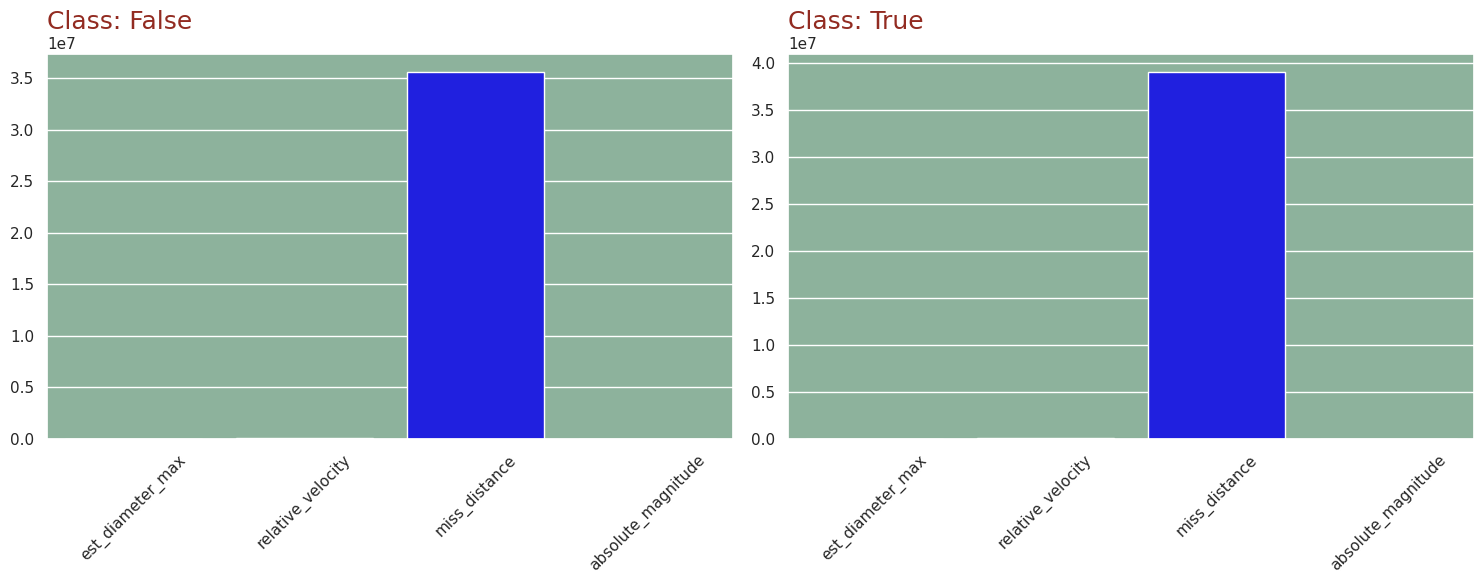

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Group the data by the 'hazardous' column
groups = data_noise_2.groupby('hazardous')

# Define the axes for the subplots
axes = [ax1, ax2]

# Define the colors for the bar plots
colors = ['#229954', '#2e4053', '#0000FF', '#FF7F50']

# Loop through each group and axis to create the bar plots
for (label, group), a in zip(groups, axes):
    # Create a bar plot for the average of each feature in the group
    sns.barplot(data=group[['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].mean(), ax=a,
                palette=colors)

    # Customize the plot's title and labels
    a.set_title(f'Class: {label}', color='#922b21', fontsize=18, loc='left')
    a.set_xticklabels(['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude'], rotation=45)
    a.set_facecolor('#8db29c')

# Display the plots
plt.tight_layout()
plt.show()

# **Encoder**

In [ ]:
data_analyses['hazardous'] = pd.Categorical(data_analyses['hazardous']).codes
test_data['hazardous'] = pd.Categorical(test_data['hazardous']).codes
val_data['hazardous'] = pd.Categorical(val_data['hazardous']).codes

data_noise['hazardous'] = pd.Categorical(data_noise['hazardous']).codes

data_resample['hazardous'] = pd.Categorical(data_resample['hazardous']).codes

data_noise_2['hazardous'] = pd.Categorical(data_noise_2['hazardous']).codes

<ipython-input-16-5900dcf018c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_noise_2['hazardous'] = pd.Categorical(data_noise_2['hazardous']).codes



# **Correlation of features**

In [ ]:
vifd = pd.DataFrame()
vifd['Feature'] = data_analyses.columns
vifd['VIF analyses'] = [variance_inflation_factor(data_analyses.values, i) for i in range(data_analyses.shape[1])]
vifd['VIF noise'] =  [variance_inflation_factor(data_noise.values, i) for i in range(data_noise.shape[1])]
vifd['VIF resample'] =  [variance_inflation_factor(data_resample.values, i) for i in range(data_resample.shape[1])]
vifd['VIF noise0'] =  [variance_inflation_factor(data_noise_2.values, i) for i in range(data_noise_2.shape[1])]

display(vifd)

Feature  VIF analyses  VIF noise  VIF resample  VIF noise0
0    est_diameter_max      1.348758   2.545285      5.645832    5.647637
1   relative_velocity      5.230914   5.932524      6.817375    6.819537
2       miss_distance      4.092015   4.056498      4.238856    4.239811
3  absolute_magnitude      4.709342   5.209404      5.796985    5.804833
4           hazardous      1.182722   1.354868      3.879358    3.879388

In [ ]:
data_analyses.drop(['relative_velocity'], axis=1, inplace=True)
test_data.drop(['relative_velocity'], axis=1, inplace=True)
val_data.drop(['relative_velocity'], axis=1, inplace=True)

data_noise.drop(['relative_velocity'], axis=1, inplace=True)

data_resample.drop(['relative_velocity'], axis=1, inplace=True)

data_noise_2.drop(['relative_velocity'], axis=1, inplace=True)

<ipython-input-18-ae9f552967b3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_noise_2.drop(['relative_velocity'], axis=1, inplace=True)


In [ ]:
# x_test, y_test = [test_data['est_diameter_max'], test_data['hazardous']]
# x_train, y_train = [data_noise_2['est_diameter_max'], data_noise_2['hazardous']]
# x_val, y_val = [val_data['est_diameter_max'], val_data['hazardous']]

# x_train =  pd.DataFrame(x_train)
# x_test = pd.DataFrame(x_test)
# x_val = pd.DataFrame(x_val)

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# x_val = scaler.transform(x_val)

# for j in range(1,10):
#       model =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=j, random_state=42)
#       model.fit(x_train, y_train)
#       y_pred = model.predict(x_val)
#       print(f'{j}  :  {accuracy_score(y_val, y_pred)}')
#       print(f1_score(y_val, y_pred))

In [ ]:
# x_test, y_test = [test_data['est_diameter_max'], test_data['hazardous']]
# x_train, y_train = [data_noise_2['est_diameter_max'], data_noise_2['hazardous']]
# x_val, y_val = [val_data['est_diameter_max'], val_data['hazardous']]

In [ ]:
# x_train =  pd.DataFrame(x_train)
# x_test = pd.DataFrame(x_test)
# x_val = pd.DataFrame(x_val)

In [ ]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# x_val = scaler.transform(x_val)

In [ ]:
# model = KNeighborsClassifier(n_neighbors=1, p=2)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
# model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
# model = LogisticRegression(solver="liblinear", max_iter=2)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
# model = SVC(kernel="rbf", gamma=0.005, C=1.0)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
# model = SVC(kernel="linear", gamma=1, C=1.0)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
# model = RandomForestClassifier(n_estimators=4, random_state=42, n_jobs=-1)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
# model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_val)
# print(f'{accuracy_score(y_val, y_pred)}')
# print(f1_score(y_val, y_pred))
# y_pred = model.predict(x_test)
# print(f'{accuracy_score(y_test, y_pred)}')
# print(f1_score(y_test, y_pred))

In [ ]:
x_test, y_test = [test_data['est_diameter_max'], test_data['hazardous']]
x_train, y_train = [data_analyses['est_diameter_max'], data_analyses['hazardous']]
x_val, y_val = [val_data['est_diameter_max'], val_data['hazardous']]
data_noise_2
x_train0, y_train0 = [data_noise['est_diameter_max'], data_noise['hazardous']]

x_train1, y_train1 = [data_resample['est_diameter_max'], data_resample['hazardous']]

x_train2, y_train2 = [data_noise_2['est_diameter_max'], data_noise_2['hazardous']]

In [ ]:
x_train =  pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_val = pd.DataFrame(x_val)

x_train0 = pd.DataFrame(x_train0)

x_train1 = pd.DataFrame(x_train1)

x_train2 = pd.DataFrame(x_train2)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

x_train0 = scaler.fit_transform(x_train0)

x_train1 = scaler.fit_transform(x_train1)

x_train2 = scaler.fit_transform(x_train2)

In [ ]:
# Function to train and evaluate models
def train_and_evaluate(name, model,  x_train, y_train, x_test, y_test):
    # Start training the model and measure the time
    start_time = time.time()
    model.fit(x_train, y_train)  # Train the model
    train_time = time.time() - start_time  # Time taken for training



    # Start predicting and measure the time
    start_time = time.time()
    y_pred = model.predict(x_test)  # Make predictions
    pred_time = time.time() - start_time  # Time taken for prediction


    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Return the results as a dictionary
    return  {
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1": round(f1, 3),
        "Training Time (s)": round(train_time, 3),
        "Prediction Time (s)": round(pred_time, 3),
        "Confusion Matrix": cm,
        "Fitted Model": model
    }

In [ ]:
# Define the models
### analyses
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3, p=2),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=25, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=3),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "SVM Linear": SVC(kernel="linear", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=3, random_state=42, n_jobs=-1)
}
### noise
models0 = {
    "KNN": KNeighborsClassifier(n_neighbors=3, p=2),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=21, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=3),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "SVM Linear": SVC(kernel="linear", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=3, random_state=42, n_jobs=-1)
}
### resample
models1 = {
    "KNN": KNeighborsClassifier(n_neighbors=1, p=2),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=2),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "SVM Linear": SVC(kernel="linear", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=4, random_state=42, n_jobs=-1)
}
### noise2
models2 = {
    "KNN": KNeighborsClassifier(n_neighbors=1, p=2),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", max_iter=2),
    "SVM RBF": SVC(kernel="rbf", gamma=2, C=1.0),
    "SVM Linear": SVC(kernel="linear", gamma=2, C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=2, random_state=42, n_jobs=-1)
}

In [ ]:
results = []
results0 = []
results1 = []
results2 = []

# Loop through each model, train and evaluate it, and store the results
for name, model in (tqdm(models.items(), desc="Training models")):
      result = train_and_evaluate(name, model, x_train, y_train, x_test,y_test)
      results.append(result)
for name, model in (tqdm(models0.items(), desc="Training models0")):
      result0 = train_and_evaluate(name, model, x_train0, y_train0, x_test,y_test)
      results0.append(result0)
for name, model in (tqdm(models1.items(), desc="Training models1")):
      result1 = train_and_evaluate(name, model, x_train1, y_train1, x_test,y_test)
      results1.append(result1)
for name, model in (tqdm(models2.items(), desc="Training models2")):
      result2 = train_and_evaluate(name, model, x_train2, y_train2, x_test,y_test)
      results2.append(result2)

Training models:  29%|██▊       | 2/7 [00:01<00:02,  2.26it/s]/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Training models:  57%|█████▋    | 4/7 [00:31<00:29,  9.84s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Training models:  71%|███████▏  | 5/7 [00:50<00:24, 12.50s/it]/usr/local/lib/python3.10/d

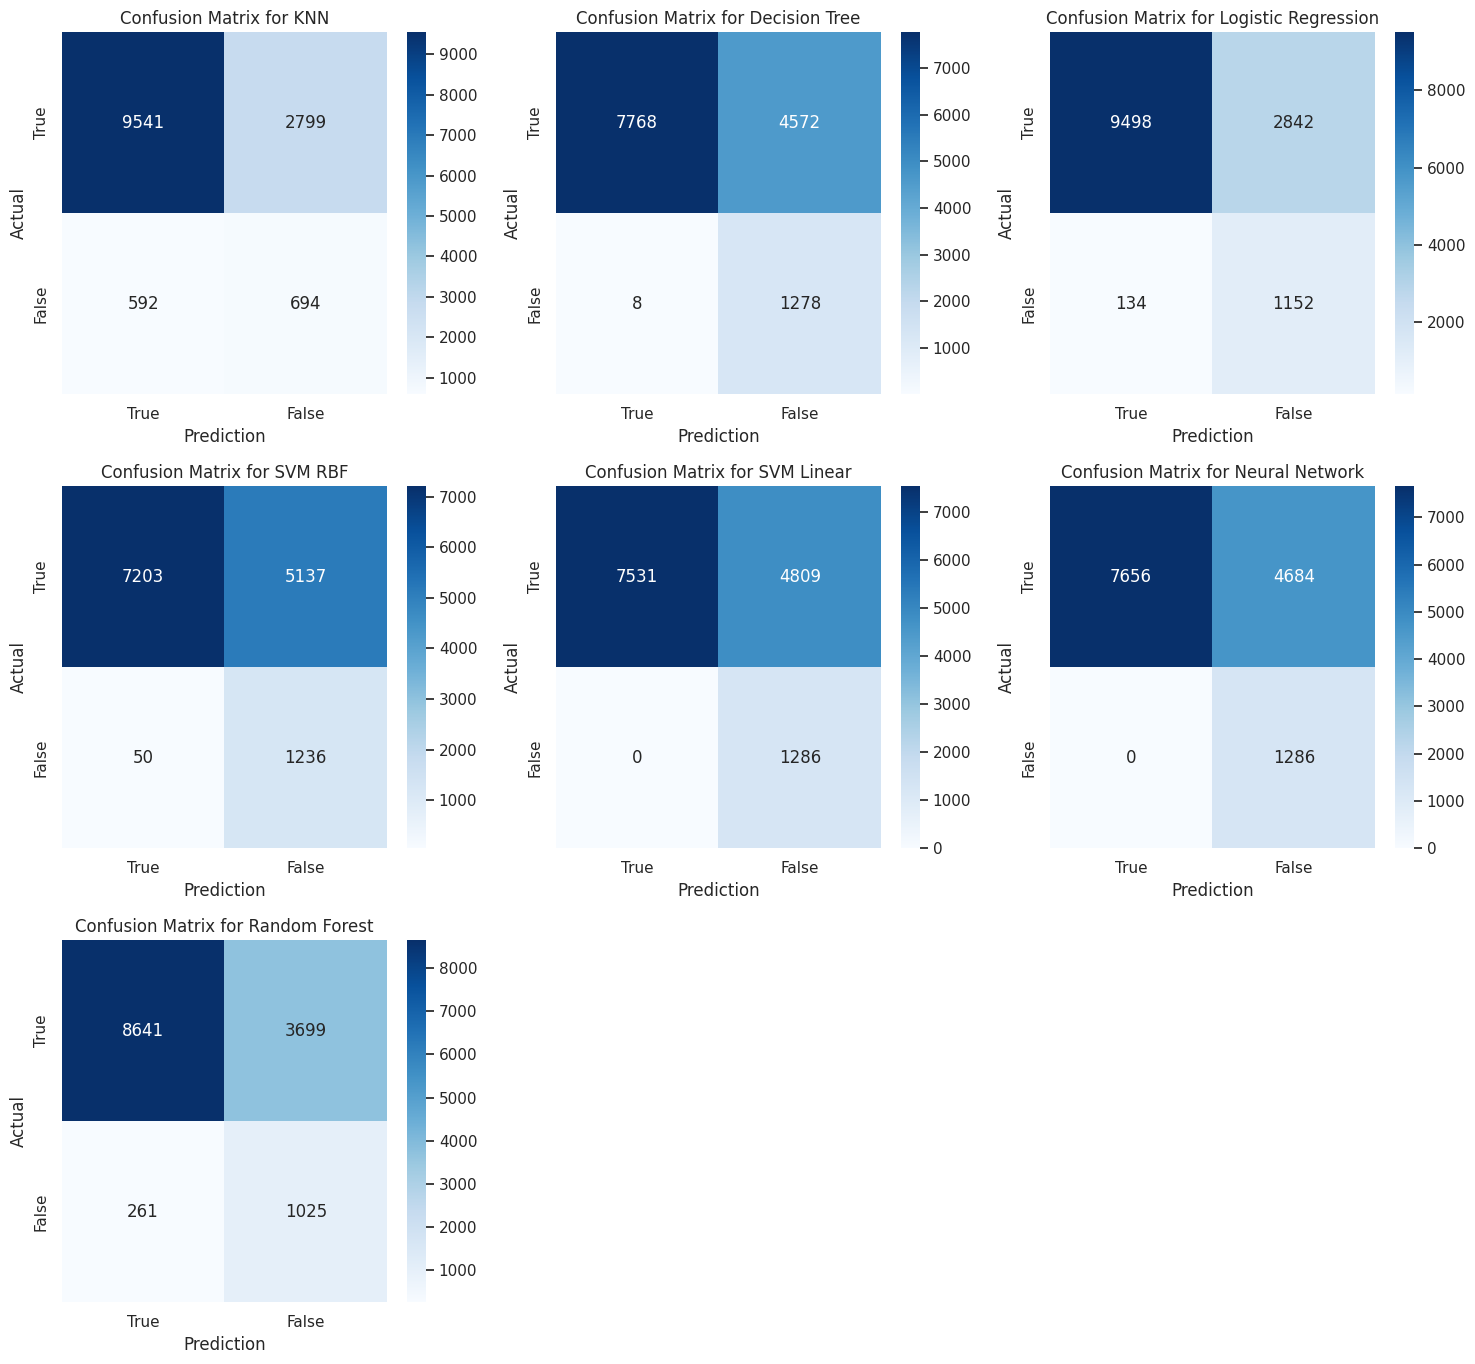

In [ ]:
if all(isinstance(result, dict) for result in results2):
      confusion_matrices = {result["Model"]: result["Confusion Matrix"] for result in results2}
else:
      print("Errore: elements in results2are not dictionaries.")
num_models = len(confusion_matrices)
num_cols = 3
num_rows = (num_models + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['True', 'False'], yticklabels=['True', 'False'])
    axes[i].set_title(f'Confusion Matrix for {name}')
    axes[i].set_xlabel('Prediction')
    axes[i].set_ylabel('Actual')

for j in range(len(confusion_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Display results as a table using tabulate
result_df = pd.DataFrame(results)
result_df0 = pd.DataFrame(results0)
result_df1 = pd.DataFrame(results1)
result_df2 = pd.DataFrame(results2)

# Display results as a table using tabulate
result_df = pd.DataFrame(results)
result_df0 = pd.DataFrame(results0)
result_df1 = pd.DataFrame(results1)
result_df2 = pd.DataFrame(results2)


# Print title and table for the first dataset (results)
print("\nResults for Model (data analyses):\n")
display(result_df)

# Print title and table for the second dataset (results0)
print("\nResults for Model (data noise):\n")
display(result_df0)

# Print title and table for the third dataset (results1)
print("\nResults for Model (data resample):\n")
display(result_df1)
# Print title and table for the fourth dataset (results2)
print("\nResults for Model (data noise2):\n")
display(result_df2)


Results for Model (data analyses):



Model  Accuracy  Precision  Recall     F1  Training Time (s)  \
0                  KNN     0.901      0.468   0.349  0.400              0.036   
1        Decision Tree     0.916      0.668   0.212  0.321              0.074   
2  Logistic Regression     0.903      0.309   0.023  0.043              0.036   
3              SVM RBF     0.906      0.000   0.000  0.000             22.598   
4           SVM Linear     0.906      0.000   0.000  0.000             16.067   
5       Neural Network     0.906      0.000   0.000  0.000              0.730   
6        Random Forest     0.915      0.641   0.231  0.340              0.132   

   Prediction Time (s)             Confusion Matrix  \
0                0.856   [[11829, 511], [837, 449]]   
1                0.002  [[12205, 135], [1014, 272]]   
2                0.001    [[12273, 67], [1256, 30]]   
3                8.190      [[12340, 0], [1286, 0]]   
4                2.340      [[12340, 0], [1286, 0]]   
5                0.009      [[12340, 0], [1286, 0]]   
6                0.013   [[12174, 166], [989, 297]]   

                                        Fitted Model  
0                KNeighborsClassifier(n_neighbors=3)  
1  DecisionTreeClassifier(max_depth=25, random_st...  
2  LogisticRegression(max_iter=3, solver='libline...  
3                                       SVC(gamma=2)  
4                      SVC(gamma=2, kernel='linear')  
5         MLPClassifier(max_iter=3, random_state=42)  
6  (DecisionTreeClassifier(max_features='sqrt', r...


Results for Model (data noise):



Model  Accuracy  Precision  Recall     F1  Training Time (s)  \
0                  KNN     0.884      0.252   0.117  0.160              0.018   
1        Decision Tree     0.890      0.277   0.103  0.150              0.036   
2  Logistic Regression     0.899      0.274   0.046  0.079              0.022   
3              SVM RBF     0.906      0.000   0.000  0.000             13.914   
4           SVM Linear     0.906      0.000   0.000  0.000              8.278   
5       Neural Network     0.906      0.000   0.000  0.000              1.046   
6        Random Forest     0.894      0.302   0.096  0.146              0.119   

   Prediction Time (s)             Confusion Matrix  \
0                0.564  [[11892, 448], [1135, 151]]   
1                0.001  [[11996, 344], [1154, 132]]   
2                0.001   [[12184, 156], [1227, 59]]   
3                6.332      [[12340, 0], [1286, 0]]   
4                2.824      [[12340, 0], [1286, 0]]   
5                0.009      [[12340, 0], [1286, 0]]   
6                0.013  [[12053, 287], [1162, 124]]   

                                        Fitted Model  
0                KNeighborsClassifier(n_neighbors=3)  
1  DecisionTreeClassifier(max_depth=21, random_st...  
2  LogisticRegression(max_iter=3, solver='libline...  
3                                       SVC(gamma=2)  
4                      SVC(gamma=2, kernel='linear')  
5         MLPClassifier(max_iter=3, random_state=42)  
6  (DecisionTreeClassifier(max_features='sqrt', r...


Results for Model (data resample):



Model  Accuracy  Precision  Recall     F1  Training Time (s)  \
0                  KNN     0.751      0.197   0.534  0.288              0.031   
1        Decision Tree     0.664      0.218   0.994  0.358              0.049   
2  Logistic Regression     0.782      0.288   0.896  0.436              0.027   
3              SVM RBF     0.620      0.194   0.961  0.323            257.034   
4           SVM Linear     0.647      0.211   1.000  0.349            183.425   
5       Neural Network     0.647      0.211   1.000  0.349              1.222   
6        Random Forest     0.711      0.215   0.778  0.337              0.248   

   Prediction Time (s)             Confusion Matrix  \
0                0.573   [[9543, 2797], [599, 687]]   
1                0.001    [[7766, 4574], [8, 1278]]   
2                0.001  [[9498, 2842], [134, 1152]]   
3               12.849   [[7207, 5133], [50, 1236]]   
4                9.169    [[7535, 4805], [0, 1286]]   
5                0.009    [[7532, 4808], [0, 1286]]   
6                0.013  [[8683, 3657], [286, 1000]]   

                                        Fitted Model  
0                KNeighborsClassifier(n_neighbors=1)  
1  DecisionTreeClassifier(max_depth=4, random_sta...  
2  LogisticRegression(max_iter=2, solver='libline...  
3                                       SVC(gamma=2)  
4                      SVC(gamma=2, kernel='linear')  
5         MLPClassifier(max_iter=3, random_state=42)  
6  (DecisionTreeClassifier(max_features='sqrt', r...


Results for Model (data noise2):



Model  Accuracy  Precision  Recall     F1  Training Time (s)  \
0                  KNN     0.751      0.199   0.540  0.290              0.032   
1        Decision Tree     0.664      0.218   0.994  0.358              0.049   
2  Logistic Regression     0.782      0.288   0.896  0.436              0.027   
3              SVM RBF     0.619      0.194   0.961  0.323            383.751   
4           SVM Linear     0.647      0.211   1.000  0.348            165.575   
5       Neural Network     0.656      0.215   1.000  0.354              1.883   
6        Random Forest     0.709      0.217   0.797  0.341              0.202   

   Prediction Time (s)             Confusion Matrix  \
0                0.614   [[9541, 2799], [592, 694]]   
1                0.001    [[7768, 4572], [8, 1278]]   
2                0.001  [[9498, 2842], [134, 1152]]   
3               12.345   [[7203, 5137], [50, 1236]]   
4                7.551    [[7531, 4809], [0, 1286]]   
5                0.018    [[7656, 4684], [0, 1286]]   
6                0.013  [[8641, 3699], [261, 1025]]   

                                        Fitted Model  
0                KNeighborsClassifier(n_neighbors=1)  
1  DecisionTreeClassifier(max_depth=4, random_sta...  
2  LogisticRegression(max_iter=2, solver='libline...  
3                                       SVC(gamma=2)  
4                      SVC(gamma=2, kernel='linear')  
5         MLPClassifier(max_iter=3, random_state=42)  
6  (DecisionTreeClassifier(max_features='sqrt', r...

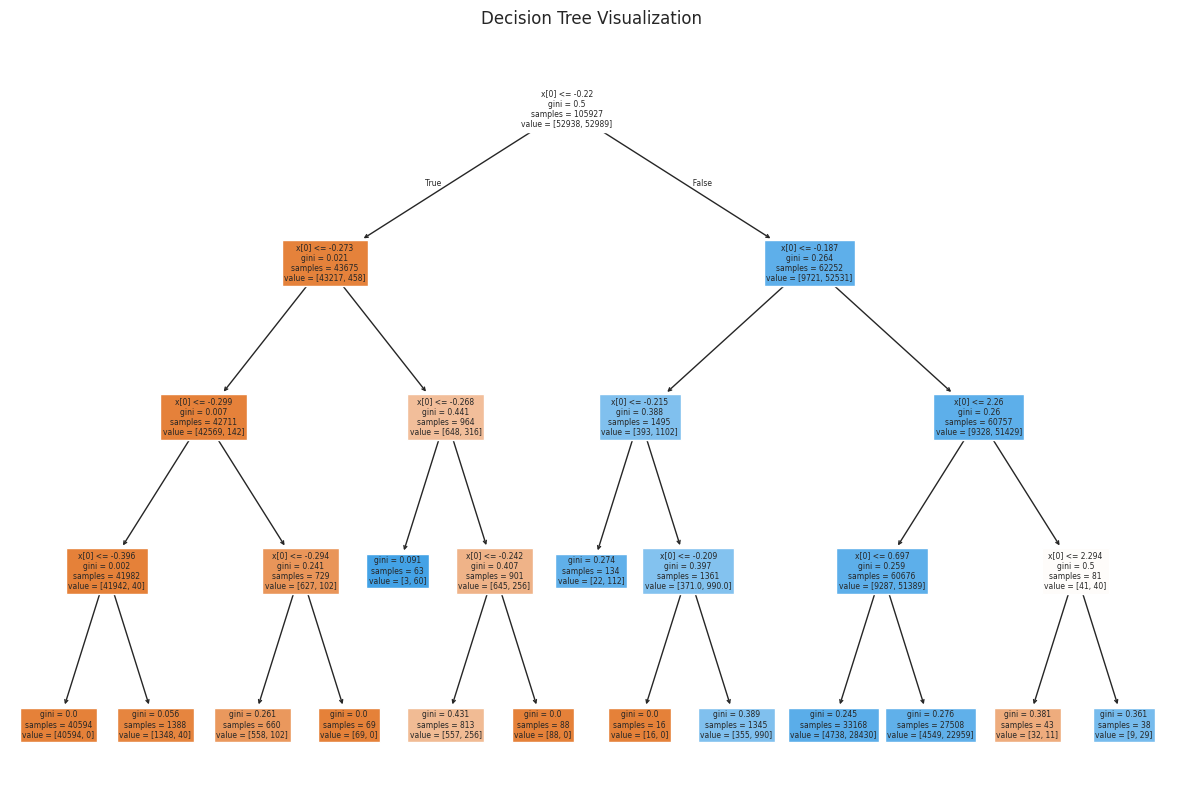

In [ ]:
dt_result = next(result for result in results2 if result["Model"] == "Decision Tree")
dt_model = dt_result["Fitted Model"]

plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# **Boosting 💓🔥**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(x_train2, y_train2)

decision_tree=  DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
decision_tree.fit(x_train2, y_train2)

logistic_regression = LogisticRegression(solver="liblinear", max_iter=2)
logistic_regression.fit(x_train2, y_train2)

svm_rbf = SVC(kernel="rbf",probability=True , gamma=2, C=1.0)
svm_rbf.fit(x_train2, y_train2)

svm_linear = SVC(kernel="linear",probability= True , gamma=2, C=1.0)
svm_linear.fit(x_train2, y_train2)

neural_network =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
neural_network.fit(x_train2, y_train2)

random_forest = RandomForestClassifier(n_estimators=3, random_state=42, n_jobs=-1)
random_forest.fit(x_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
k_val_pred = knn.predict_proba(x_val)[:,  1]
dt_val_pred = decision_tree.predict_proba(x_val)[:,  1]
lr_val_pred = logistic_regression.predict_proba(x_val)[:,  1]
sr_val_pred = svm_rbf.predict_proba(x_val)[:,  1]
sl_val_pred = svm_linear.predict_proba(x_val)[:,  1]
nn_val_pred = neural_network.predict_proba(x_val)[:,  1]
rf_val_pred = random_forest.predict_proba(x_val)[:,  1]

meta_inputs_val = np.vstack([k_val_pred,  dt_val_pred,  lr_val_pred,  sr_val_pred,  sl_val_pred,  nn_val_pred,  rf_val_pred]).T
meta_inputs_val = np.hstack([meta_inputs_val, x_val])

k_test_pred = knn.predict_proba(x_test)[:,  1]
dt_test_pred = decision_tree.predict_proba(x_test)[:,  1]
lr_test_pred = logistic_regression.predict_proba(x_test)[:,  1]
sr_test_pred = svm_rbf.predict_proba(x_test)[:,  1]
sl_test_pred = svm_linear.predict_proba(x_test)[:,  1]
nn_test_pred = neural_network.predict_proba(x_test)[:,  1]
rf_test_pred = random_forest.predict_proba(x_test)[:,  1]

meta_inputs_test = np.vstack([k_test_pred,  dt_test_pred,  lr_test_pred,  sr_test_pred, sl_test_pred,  nn_test_pred,  rf_test_pred]).T
meta_inputs_test= np.hstack([meta_inputs_test, x_test])

In [ ]:
meta_model  = Sequential([Dense(16, activation= 'relu', input_shape=(meta_inputs_val.shape[1], )),
                          Dense(8, activation= 'relu'),
                          Dense(1, activation= 'sigmoid')
])
meta_model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=  ['accuracy'])

meta_model.fit(meta_inputs_val, y_val,  epochs=10,  batch_size=16,  verbose=1)
meta_test_preds = meta_model.predict(meta_inputs_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9038 - loss: 0.3799
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9035 - loss: 0.2139
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9016 - loss: 0.2106
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 0.2007
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9006 - loss: 0.2073
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9053 - loss: 0.2009
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9033 - loss: 0.2025
Epoch 8/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9032 - loss: 0.2008
Epoch 9/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9026 - loss: 0.2013
Epoch 10/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9080 - loss: 0.1980
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
